In [115]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
import numpy as np
import pandas as pd
import os, sys
import seaborn as sns
sns.set(style="ticks")
from pylab import rcParams
# rcParams['figure.figsize'] = 25, 20
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'
matplotlib.style.use('ggplot')
import statsmodels.formula.api as smf
import statsmodels.api as sm
import missingno as msno
%matplotlib inline

In [116]:
def get_subgroup(dataframe, g_index, g_columns):
    """ check duplicate data """
    g = dataframe.groupby(g_index).agg({col:'nunique' for col in g_columns})
    if g[g > 1].dropna().shape[0] != 0:
        print(" the group has mult same values !")
    return dataframe.groupby(g_index).agg({col:'max' for col in g_columns})

def load_subgroup(filename, index_col=[0]):
    return pd.read_csv(filename, compression='gzip', index_col=index_col)

def save_subgroup(dataframe, g_index, subgroup_name, prefix='raw_'):
    """ save dataframe in csv """
    save_subgroup_filename = "".join([prefix, subgroup_name, ".csv.gz"])
    dataframe.to_csv(save_subgroup_filename, compression='gzip', encoding='UTF-8')

In [117]:
players = load_subgroup("stats.csv.gz")
print(players.shape)
players.head()


(649, 29)


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,C,26.0,OKC,58.0,58.0,27.0,4.5,7.6,0.591,...,0.590,3.4,6.0,9.4,2.4,0.9,1.1,1.5,1.9,10.9
1,Bam Adebayo,PF,22.0,MIA,65.0,65.0,34.4,6.3,11.1,0.567,...,0.690,2.5,8.0,10.5,5.1,1.2,1.3,2.8,2.5,16.2
2,LaMarcus Aldridge,C,34.0,SAS,53.0,53.0,33.1,7.4,15.0,0.493,...,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,Nickeil Alexander-Walker,SG,21.0,NOP,41.0,0.0,12.2,1.9,5.5,0.339,...,0.607,0.2,1.8,2.0,1.8,0.3,0.2,1.0,1.1,5.1
4,Grayson Allen,SG,24.0,MEM,30.0,0.0,16.6,2.6,5.9,0.449,...,0.857,0.2,2.0,2.2,1.4,0.2,0.0,0.8,1.2,7.4


In [118]:
raw_salary = load_subgroup("salary.csv.gz")
print(raw_salary.shape)

raw_salary.head()

(564, 6)


,RK,NAME,TEAM,SALARY,full-name,state
0,1,"Stephen Curry, PG",Golden State Warriors,40231758.0,Stephen Curry,PG
1,2,"Chris Paul, PG",Oklahoma City Thunder,38506482.0,Chris Paul,PG
2,3,"Russell Westbrook, PG",Houston Rockets,38506482.0,Russell Westbrook,PG
3,4,"John Wall, PG",Washington Wizards,38199000.0,John Wall,PG
4,5,"Kevin Durant, SF",Brooklyn Nets,38199000.0,Kevin Durant,SF


In [119]:
salary = raw_salary[['full-name','SALARY','RK']]

In [120]:
salary = salary.rename(columns={'full-name':'Player','SALARY':'Salary','RK':'rk'})
# salary

## merge

In [121]:
# players

In [122]:
df = pd.merge(salary,players,on="Player",how='outer')
# df

In [123]:
df.columns

Index(['Player', 'Salary', 'rk', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS'],
      dtype='object')

In [124]:
merge_data = get_subgroup(df, 'Player',  df.columns)
merge_data
merge_data.drop(['Player'], axis=1)

,Salary,rk,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
Aaron Gordon,19863636.0,54,PF,24.0,ORL,58.0,58.0,33.0,5.4,12.5,...,0.675,1.8,5.8,7.6,3.7,0.9,0.6,1.6,2.0,14.4
Aaron Holiday,2329200.0,308,PG,23.0,IND,58.0,26.0,23.6,3.5,8.6,...,0.861,0.4,1.9,2.3,3.3,0.8,0.2,1.3,1.8,9.4
Aaron Jackson,1378242.0,469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abdel Nader,1618520.0,399,SF,26.0,OKC,48.0,5.0,15.8,2.1,4.6,...,0.774,0.3,1.6,1.9,0.7,0.4,0.4,0.8,1.4,6.0
Adam Mokoka,NaN,NaN,SG,21.0,CHI,11.0,0.0,10.2,1.1,2.5,...,0.500,0.6,0.3,0.9,0.4,0.4,0.0,0.2,1.5,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach Randolph,11692308.0,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zhaire Smith,3058800.0,269,SG,20.0,PHI,7.0,0.0,4.6,0.4,1.6,...,0.500,0.0,0.3,0.3,0.3,0.4,0.0,0.3,0.6,1.1
Zhou Qi,1378242.0,468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
merge_data.to_csv("players_salary.csv.gz", compression='gzip')

In [126]:
players_salary = load_subgroup("players_salary.csv.gz")
players_salary.shape
players_salary.head()

,Player.1,Salary,rk,Pos,Age,Tm,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
Aaron Gordon,Aaron Gordon,19863636.0,54,PF,24.0,ORL,58.0,58.0,33.0,5.4,...,0.675,1.8,5.8,7.6,3.7,0.9,0.6,1.6,2.0,14.4
Aaron Holiday,Aaron Holiday,2329200.0,308,PG,23.0,IND,58.0,26.0,23.6,3.5,...,0.861,0.4,1.9,2.3,3.3,0.8,0.2,1.3,1.8,9.4
Aaron Jackson,Aaron Jackson,1378242.0,469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abdel Nader,Abdel Nader,1618520.0,399,SF,26.0,OKC,48.0,5.0,15.8,2.1,...,0.774,0.3,1.6,1.9,0.7,0.4,0.4,0.8,1.4,6.0
Adam Mokoka,Adam Mokoka,NaN,NaN,SG,21.0,CHI,11.0,0.0,10.2,1.1,...,0.500,0.6,0.3,0.9,0.4,0.4,0.0,0.2,1.5,2.9


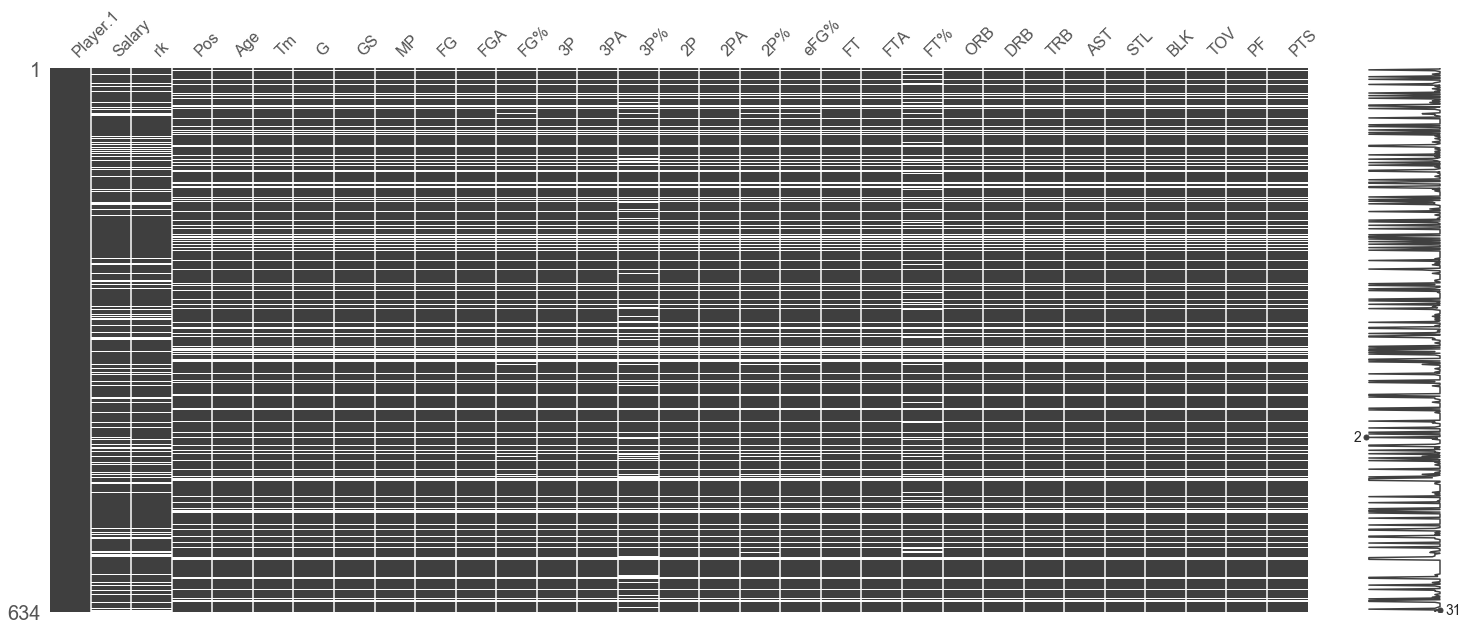

In [127]:
msno.matrix(players_salary.sample(634))

In [128]:
clear_players_salary = players_salary.dropna()

clear_players_salary.shape

(385, 31)

In [129]:
clear_players_salary.head()


,Player.1,Salary,rk,Pos,Age,Tm,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
Aaron Gordon,Aaron Gordon,19863636.0,54,PF,24.0,ORL,58.0,58.0,33.0,5.4,...,0.675,1.8,5.8,7.6,3.7,0.9,0.6,1.6,2.0,14.4
Aaron Holiday,Aaron Holiday,2329200.0,308,PG,23.0,IND,58.0,26.0,23.6,3.5,...,0.861,0.4,1.9,2.3,3.3,0.8,0.2,1.3,1.8,9.4
Abdel Nader,Abdel Nader,1618520.0,399,SF,26.0,OKC,48.0,5.0,15.8,2.1,...,0.774,0.3,1.6,1.9,0.7,0.4,0.4,0.8,1.4,6.0
Admiral Schofield,Admiral Schofield,1000000.0,480,SF,22.0,WAS,27.0,2.0,10.9,1.1,...,0.692,0.2,1.0,1.3,0.5,0.3,0.1,0.3,1.5,3.1
Al Horford,Al Horford,28000000.0,23,C,33.0,PHI,60.0,57.0,30.8,4.8,...,0.753,1.5,5.3,6.9,4.1,0.9,0.9,1.1,2.1,12.0


In [131]:
clear_players_salary.describe()

,Salary,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,3.850000e+02,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,...,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,7.849734e+06,25.836364,45.927273,22.581818,22.035065,3.692208,8.109870,0.457429,1.110390,3.134545,...,0.763894,0.903117,3.109091,4.002597,2.241039,0.719221,0.452727,1.286494,1.915325,10.074805
std,9.024784e+06,4.199048,16.590971,23.185600,8.448785,2.275216,4.776053,0.089461,0.876782,2.247400,...,0.129042,0.735797,1.798551,2.375941,1.845315,0.405617,0.428417,0.841733,0.738452,6.393707
min,3.501890e+05,19.000000,2.000000,0.000000,2.800000,0.100000,0.800000,0.143000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.400000
25%,1.620564e+06,22.000000,35.000000,2.000000,15.600000,1.900000,4.400000,0.410000,0.400000,1.500000,...,0.697000,0.400000,1.800000,2.300000,1.000000,0.400000,0.200000,0.700000,1.400000,5.100000
50%,3.623000e+06,25.000000,51.000000,13.000000,22.400000,3.200000,6.800000,0.448000,1.000000,2.800000,...,0.779000,0.700000,2.800000,3.500000,1.600000,0.700000,0.300000,1.000000,1.900000,8.600000
75%,1.025938e+07,29.000000,59.000000,46.000000,29.100000,4.800000,11.100000,0.489000,1.600000,4.300000,...,0.843000,1.200000,4.000000,5.100000,3.000000,0.900000,0.500000,1.600000,2.300000,13.100000
max,4.023176e+07,43.000000,66.000000,65.000000,36.900000,10.900000,22.900000,1.000000,4.400000,12.600000,...,1.000000,4.600000,11.500000,15.800000,10.600000,2.100000,3.100000,4.800000,4.100000,34.400000
